# LDA (Linear Discriminant Analysis)

### LDA란?

- 선형 판별 분석법, PCA와 유사
- Classification에서 용이하도록, 개별 클래스 분별 기준을 유지하면서 차원을 축소함
    
    → 입력 데이터의 **결정 값 클래스를 최대한으로 분리할 수 있는 축**을 찾음
    
    → 클래스 간 분산과 클래스 내부 분산의 비율을 최대화하는 방식으로 차원을 축소함
    
    → 클래스 간 분산은 크게(멀리 떨어지게), 클래스 내부 분산은 작게 (모여있게)
    
    → 이를 위해, 공분산 행렬이 아니라 클래스 간 분산, 클래스 내부 분산 행렬을 생성
    

$$
S_W^TS_B = [e_1~...~e_n]\begin{bmatrix}\lambda_1 &...&0\\...&...&...\\0&...&\lambda_n\end{bmatrix}\begin{bmatrix}e_1^t\\...\\e_n^t\end{bmatrix}
$$

- Step
    1. 클래스 내부와 클래스 간 분산 행렬을 구함. 두 개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터 (mean vector) 기반 구함
    2. 클래스 내부 분산 행렬: $S_W^T$
        
        클래스 간 분산 행렬: $S_B$
        
        위와 같이 분해
        
    3. 고유값이 큰 순으로 K개(LDA변환 차수만큼) 추출
    4. 고유값이 큰 순으로 추출된 고유벡터 이용 새롭게 입력 데이터 변환

### 붓꽃 데이터 셋에 LDA 적용하기 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
# 지도 학습!
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


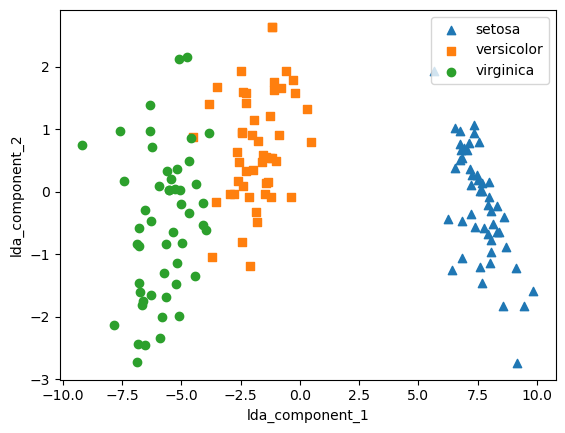

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


LDA를 적용하니 확실히 PCA 적용시보다 더 분류가 쉬워짐  
주의할 점은 LDA는 지도학습임  
그래서, fit에 iris.target 값이 들어감  